In [ ]:
from keras.models import load_model
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os


In [ ]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('theDeepFakeBuster.keras')

In [ ]:
#this function prepares the image for prediction and allows it to be resized
def prepare_image(image):
    image_size = 90 #this determines the height and width of the image
    image_array = cv2.imread(image, cv2.IMREAD_COLOR)
    resize_array = cv2.resize(image_array, (image_size, image_size))
    return resize_array.reshape(-1, image_size, image_size, 3)
def detect(imagePath, model):
    #uploads an image to the prorgram
    x = plt.imread(imagePath) # This directory should be changed
    plt.imshow(x)
    #this maked the prediction based on the cnn weights
    x = model.predict([prepare_image(imagePath)])
    #this reads the np.argmax value and determines if the image is real or fake based on the value
    if np.argmax(x) == 0:
        print("The image is fake")
    elif np.argmax(x) == 1:
        print("The image is real")
def slash_changer(directory):

    if "\\" in directory:
        return directory.replace(os.sep, '/')
    else:
        return directory


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step
The image is fake


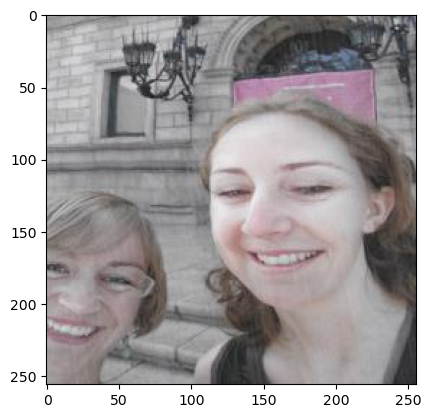

In [ ]:
#slash_changer is so that you don't have to change slashes when copy and pasting file path. This makes it so that you can just copy and paste
#the file when using jupyter notebook. If you're using this code on a different compiler or on colab and it doesn't work try getting rid of
#slash_changer from image_path and the r before " "
imagePath = slash_changer(r"C:\Users\josep\OneDrive\Documents\Downloads\archive\Dataset\Test\Fake\fake_305.jpg")
detect(imagePath, model)